In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
taxi = pd.read_csv("train/train.csv")

In [3]:
taxi["count"] = 1

In [4]:
import datetime as dt

## pickup_datetime 살피기

In [5]:
# pd.to_datetime을 해줘야 pickup_datetime coulmn의 data type이 datetime으로 됨.
pickup_datetime_dt = pd.to_datetime(taxi["pickup_datetime"])
dropoff_datetime_dt = pd.to_datetime(taxi["dropoff_datetime"])

In [6]:
# trip_duration, count를 포함하고, pickup_datetime의 data로만 이루어진 dataframe(taxi_df1)을 만든다.
taxi_df1 = taxi.loc[:, ["trip_duration", "count"]]
taxi_df1["pickup_datetime"] = pickup_datetime_dt

In [7]:
# pickup datetime 중 year, month, day
taxi_df1.loc[:, "pickup_date"] = taxi_df1["pickup_datetime"].dt.date
# pickup datetime 중 month만 가져와서 새로 column을 만듦.
taxi_df1.loc[:, "pickup_month"] = taxi_df1["pickup_datetime"].dt.month
# pickup datetime 중 hour만 가져와서 새로 column을 만듦.
taxi_df1.loc[:, "pickup_hour"] = taxi_df1["pickup_datetime"].dt.hour
# pickup datetime 중 요일만 가져와서 새로 column을 만듦.
# 월요일은 0이고, 일요일은 6임.
taxi_df1.loc[:, "pickup_weekday"] = taxi_df1["pickup_datetime"].dt.weekday

In [8]:
taxi_df1.tail()

,trip_duration,count,pickup_datetime,pickup_date,pickup_month,pickup_hour,pickup_weekday
1458639,778,1,2016-04-08 13:31:04,2016-04-08,4,13,4
1458640,655,1,2016-01-10 07:35:15,2016-01-10,1,7,6
1458641,764,1,2016-04-22 06:57:41,2016-04-22,4,6,4
1458642,373,1,2016-01-05 15:56:26,2016-01-05,1,15,1
1458643,198,1,2016-04-05 14:44:25,2016-04-05,4,14,1


- year 살피기

In [9]:
print(taxi_df1["pickup_datetime"].dt.year.min())
print(taxi_df1["pickup_datetime"].dt.year.max())

2016
2016


- month 살피기

In [10]:
print(taxi_df1["pickup_month"].min())
print(taxi_df1["pickup_month"].max())

1
6


In [11]:
taxi_month_1 = taxi_df1.loc[:, ["pickup_month", "count"]]
taxi_month_1.groupby("pickup_month").sum()

,count
pickup_month,
1,229707
2,238300
3,256189
4,251645
5,248487
6,234316


In [12]:
taxi_month_2 = taxi_df1.loc[:, ["pickup_month", "trip_duration"]]
taxi_month_2 = taxi_month_2.groupby("pickup_month").mean()
taxi_month_2

,trip_duration
pickup_month,
1,922.373319
2,920.830453
3,937.365363
4,962.891462
5,999.450555
6,1013.367226


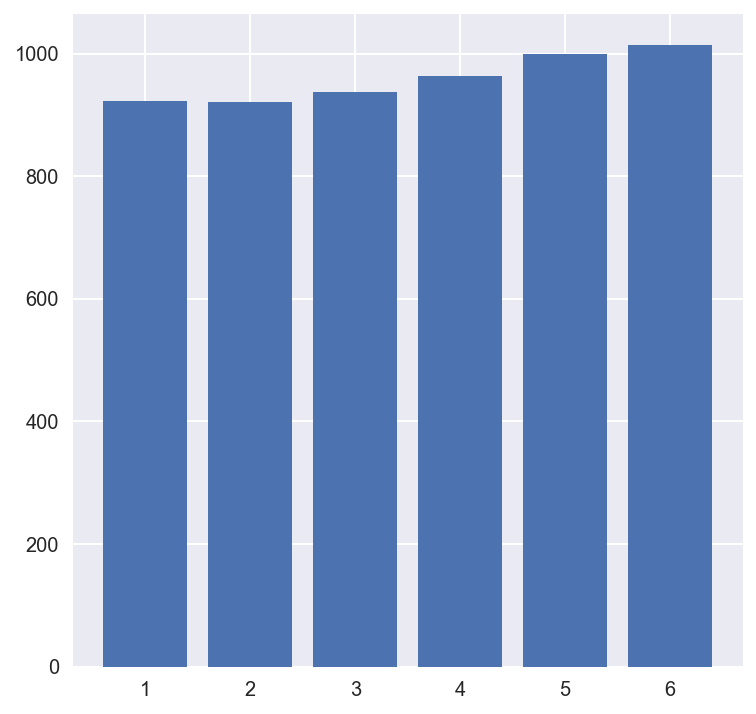

In [13]:
x1 = taxi_month_2.index
y1 = taxi_month_2["trip_duration"]
plt.figure(figsize = (6, 6))
plt.bar(x1, y1)
plt.show()

- hour 살피기

In [14]:
print(taxi_df1["pickup_hour"].min())
print(taxi_df1["pickup_hour"].max())

0
23


In [15]:
taxi_hour_1 = taxi_df1.loc[:, ["pickup_hour", "count"]]
taxi_hour_1.groupby("pickup_hour").sum()

,count
pickup_hour,
0,53248
1,38571
2,27972
3,20895
4,15792
5,15002
6,33248
7,55600
8,67053


In [16]:
taxi_hour_2 = taxi_df1.loc[:, ["pickup_hour", "trip_duration"]]
taxi_hour_2 = taxi_hour_2.groupby("pickup_hour").mean()
taxi_hour_2

,trip_duration
pickup_hour,
0,936.657302
1,903.087112
2,890.076934
3,890.070878
4,921.976444
5,822.298960
6,797.434943
7,831.758345
8,924.559199


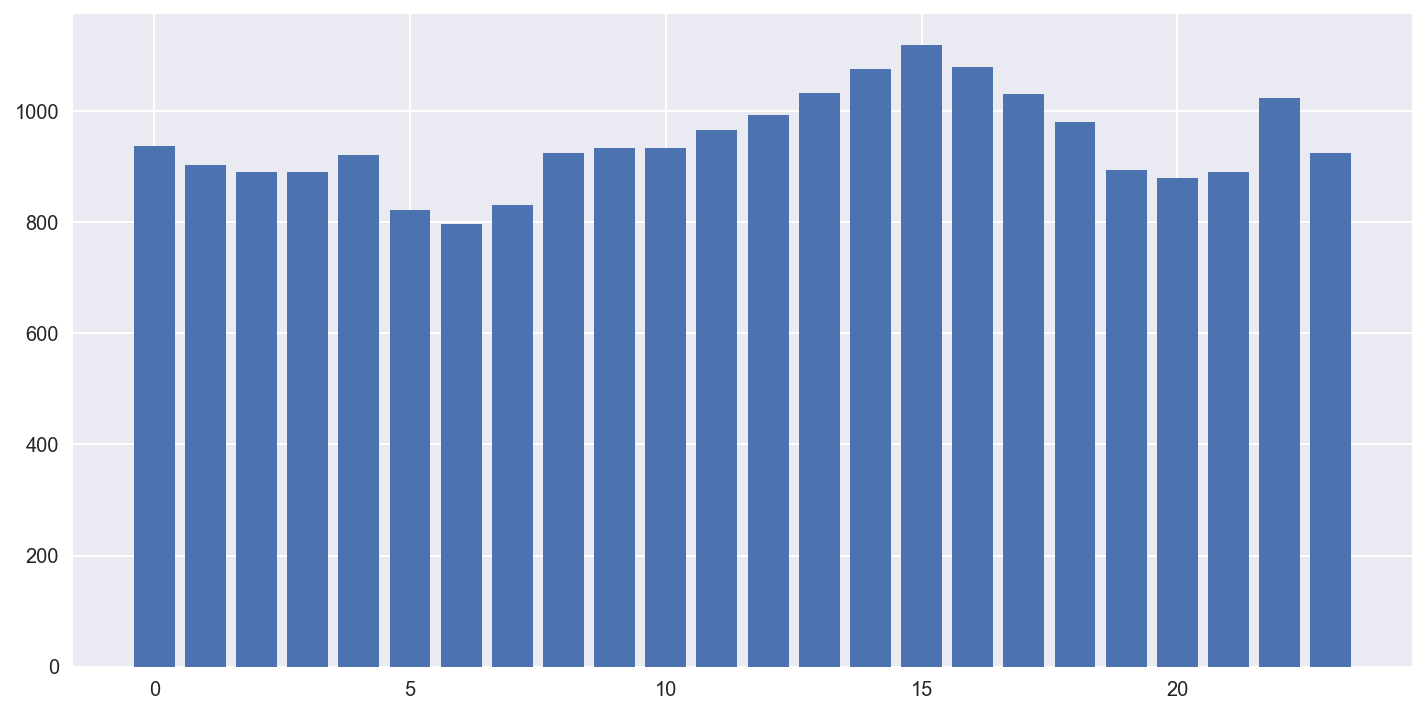

In [17]:
x2 = taxi_hour_2.index
y2 = taxi_hour_2["trip_duration"]
plt.figure(figsize = (12, 6))
plt.bar(x2, y2)
plt.show()

- 요일 살피기

In [18]:
print(taxi_df1["pickup_weekday"].min())
print(taxi_df1["pickup_weekday"].max())

0
6


In [19]:
taxi_weekday_1 = taxi_df1.loc[:, ["pickup_weekday", "count"]]
taxi_weekday_1.groupby("pickup_weekday").sum()

,count
pickup_weekday,
0,187418
1,202749
2,210136
3,218574
4,223533
5,220868
6,195366


In [20]:
taxi_weekday_2 = taxi_df1.loc[:, ["pickup_weekday", "trip_duration"]]
taxi_weekday_2 = taxi_weekday_2.groupby("pickup_weekday").mean()
taxi_weekday_2

,trip_duration
pickup_weekday,
0,897.947839
1,983.463124
2,975.450494
3,1006.528654
4,990.224200
5,948.051175
6,901.639395


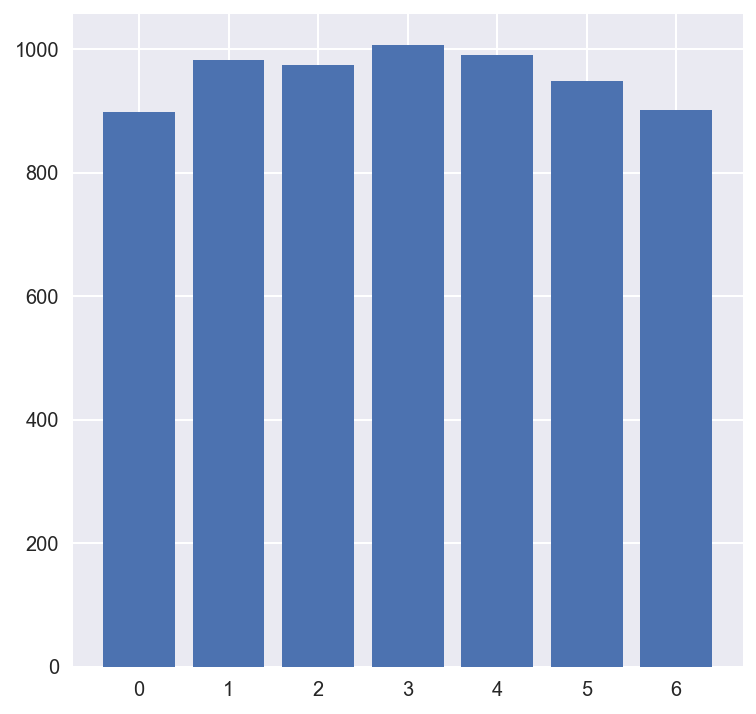

In [21]:
x3 = taxi_weekday_2.index
y3 = taxi_weekday_2["trip_duration"]
plt.figure(figsize = (6, 6))
plt.bar(x3, y3)
plt.show()

### EDA of pickup_datetime in train data
- year : 2016년 
- month : 1~6월
- hour : 0~23시
- weekday : 월요일~일요일